BRAHAM Elyes (code non fonctionnel et incomplet)

Ce code présente une tentative de programmation de l'algorithm de Fitch, ainsi que l'utilisation de la librairie Biopython pour manipuler des arbres phylogénétiques.

Sources : https://biopython.org/wiki/Phylo 
          https://github.com/osnow/Fitch_project

Packages et librairies python

In [455]:
#!/usr/bin/python3
#-*- coding : utf-8 -*-
import os, sys
import pandas as pd
import Bio as Bio 
import itertools
import pylab
from Bio import Phylo, AlignIO 
from io import StringIO 
from Bio.Phylo.TreeConstruction import *

Données de l'arbre (à modifier si l'on veut changer l'exemple d'entrée)

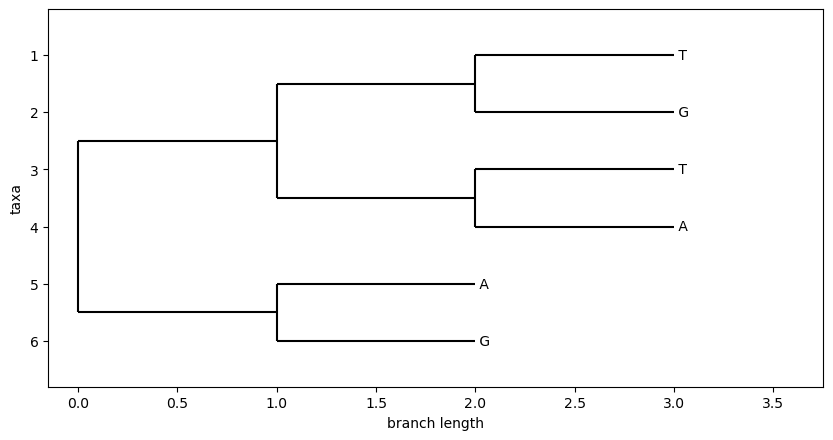

Tree(rooted=False, weight=1.0)
    Clade(branch_length=0.0)
        Clade(branch_length=0.0)
            Clade(branch_length=0.0)
                Clade(branch_length=0.0, name='T')
                Clade(branch_length=0.0, name='G')
            Clade(branch_length=0.0)
                Clade(branch_length=0.0, name='T')
                Clade(branch_length=0.0, name='A')
        Clade(branch_length=0.0)
            Clade(branch_length=0.0, name='A')
            Clade(branch_length=0.0, name='G')


In [456]:
treedata = "(((T, G), (T, A)), (A, G));"   # Exemple vu en cours au standard Newick
handle = StringIO(treedata)                # Données mises en mémoire
tree = Phylo.read(handle, "newick")        # Renvoie une arborescence à partir du "handle" mémoire StringIO
fig = plt.figure(figsize=(10, 5), dpi=100) # Plot de l'arborescence 
axes = fig.add_subplot(1, 1, 1)            # Ajout des axes branch length et taxa (même si leur valeur importe peu dans notre cas)
Phylo.draw(tree, axes=axes)                # Visualisation de l'arborescence
Phylo.write(tree, "tree.nw", "newick")     # Sauvegarde dans un fichier au format newick pour plus tard
tree = Phylo.read("tree.nw", "newick")     # Création d'un fichier .nw 
print(tree)                              

In [460]:
def phase_montante(self, tree): 
    clade.character = set([treedata.loc[clade.label]])
    for clade in tree.get_nonterminals(order="postorder"):
        clade_childs = clade.clades # les clade de chaque noeuds intersectionne
        etiq1 = []  # Etiquette provisoire 1 {X,
        etiq2 = []  # Etiquette provisoire 2 ,X}
        
        if type(clade_childs[0].character) == str: 
            etiq1.append(clade[0].character) 
        if type(clade_childs[1].character) == str:
            etiq2.append(clade[1].character)
        
        intersection = set(etiq1) & set(etiq2)
        union = set(etiq1) | set(etiq2)
        if len(intersection) == 0:
            clade.character = union
        else:
            clade.character = intersection

In [467]:
#Incomplet 
#def phase_descendante(self):
   # parent = clade.parent
   # for clade in tree.get_nonterminals(order="preorder"):
   #     if type(clade.name) == str:
   #         clade.name = ','.join(clade.name) 
   #         for clade_childs in clade.clades:
   #              if str[clade_childs.name] == str[clade.name]:

Exemple en utilisant les implémentations Biopython

In [372]:
data = {'name' : ['a', 'b', 'c', 'd', 'e', 'f'],
        'seq': ['ACT',
                 'AGA',
                 'TGA',
                 'AGT',
                 'ACT',
                 'TCG']
}
ndf = pd.DataFrame.from_dict(data)
print(ndf)

  name  seq
0    a  ACT
1    b  AGA
2    c  TGA
3    d  AGT
4    e  ACT
5    f  TCG


Conversion au format phylip

In [447]:
with open("tree.phy", 'w') as f:
    f.write("{:10} {}\n".format(ndf.shape[0], ndf.seq.str.len()[0]))
    for row in ndf.iterrows():
        f.write("{:10} {}\n".format(*row[1].to_list()))

Alignement des séquences 

In [448]:
aln = AlignIO.read(open('tree.phy'), 'phylip')
print(aln)

Alignment with 6 rows and 3 columns
ACT a
AGA b
TGA c
AGT d
ACT e
TCG f


Calculer le score de parcimonie basé sur l'algorithme de Fitch

In [ ]:
starting_tree = Phylo.read('tree.phy', 'newick')
scorer = Phylo.TreeConstruction.ParsimonyScorer() 
searcher = Phylo.TreeConstruction.NNITreeSearcher(scorer) 
constructor = Phylo.TreeConstruction.ParsimonyTreeConstructor(searcher, starting_tree)
pars_tree = constructor.build_tree(aln)
print(starting_tree)
Phylo.draw(starting_tree, axes=axes) 